# Cluster Analysis I


## What is Cluster Analysis?!

- **Cluster**: A collection of data objects
  - **similar** (or related) to one another within the same group
  - **dissimilar** (or unrelated) to the objects in other groups
- **Cluster analysis** (or clustering, data segmentation, ...)
  - Finding similarities between data according to the characteristics found in the data and grouping similar data objects into clusters
- **Unsupervised learning**: no predefined classes (i.e., learning by observations vs. learning by examples: supervised)
- Typical applications:
  - As a **stand-alone tool** to get insight into data distribution 
  - As a **preprocessing step** for other algorithms

## Clustering for Data Understanding and Applications!

- Biology: taxonomy of living things: kingdom, phylum, class, order, family, genus and species
- Information retrieval: document clustering
- Land use: Identification of areas of similar land use in an earth observation database
- Marketing: Help marketers discover distinct groups in their customer bases, and then use this knowledge to develop targeted marketing programs
- City-planning: Identifying groups of houses according to their house type, value, and geographical location
- Earth-quake studies: Observed earth quake epicenters should be clustered along continent faults
- Climate: understanding earth climate, find patterns of atmospheric and ocean
- Economic Science: market research

## Toy Example

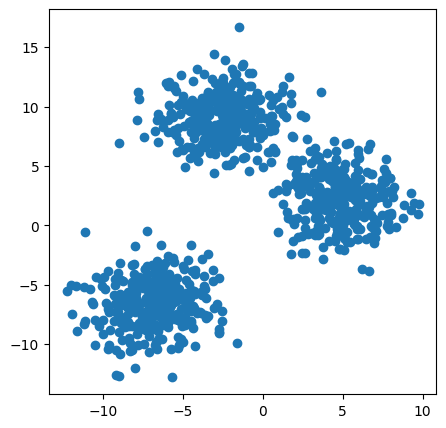

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
# use the following for more interactive plots
# %matplotlib inline 

import numpy as np

from sklearn.datasets import make_blobs

N_SAMPLES = 1000
N_CENTERS = 3

# create a random dataset
X, labels_true = make_blobs(n_samples=N_SAMPLES, 
                            centers=N_CENTERS, 
                            cluster_std=2.0,
                            random_state=42)

# plot
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(X[:,0], X[:,1]);

In [2]:
X[:10,:]

array([[-6.31305145, -7.39791954],
       [-5.39543645, -6.28152443],
       [ 5.75653266,  2.12518047],
       [-3.42791942,  7.31459739],
       [-3.02838033,  6.00800022],
       [-6.76560094, -6.34292504],
       [ 5.40027454,  3.19434117],
       [ 6.47253419,  2.66614664],
       [ 5.0877071 ,  4.70145054],
       [ 7.05289677,  0.33929834]])

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


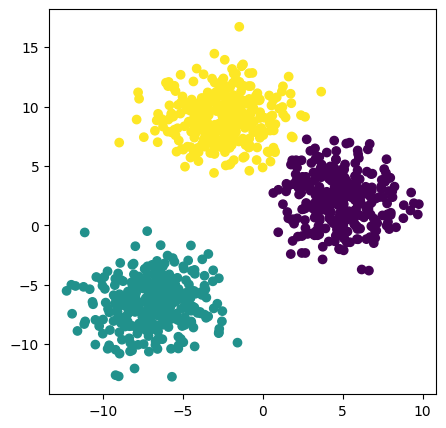

In [3]:
# run a clustering algorithm
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=N_CENTERS)
k_means.fit(X)

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(X[:,0], X[:,1], c=k_means.labels_);

In [4]:
k_means.labels_[:10]

array([1, 1, 0, 2, 2, 1, 0, 0, 0, 0], dtype=int32)

## Quality: What Is a Good Clustering?!

- A good clustering method will produce high quality clusters
  - **high intra-class similarity**: cohesive within clusters
  - **low inter-class similarity**: distinctive between clusters
- The quality of a clustering method depends on
  - the **similarity measure** used by the method 
  - its implementation, and
  - Its ability to discover some or all of the hidden patterns
- Measuring clustering quality is difficult:
  - in general, the **true clustering is not know**
    - there is no objective benchmark of the clustering
  - **similarity-based measures** might not suffice (e.g., curse of dimensionality)
  - perceived quality by the analyst is **highly subjective**

## Considerations for Cluster Analysis!

- Partitioning criteria
  - **Single level vs. hierarchical** partitioning (often, multi-level hierarchical partitioning is desirable)
- Separation of clusters
  - **Exclusive** (e.g., one customer belongs to only one region) **vs. non-exclusive** (e.g., one document may belong to more than one class)
- Similarity measure
  - **Distance-based** (e.g., Euclidian, road network, vector)  vs. **connectivity-based** (e.g., density or contiguity)
- Clustering space
  - **Full space** (often when low dimensional) **vs. subspaces** (often in high-dimensional clustering)


## Requirements and Challenges

- Scalability
  - Clustering all the data instead of only on samples
- Ability to deal with different types of attributes
  - Numerical, binary, categorical, ordinal, linked, and mixture of these 
- Constraint-based clustering
  - User may give inputs on constraints
  - Use domain knowledge to determine input parameters
- Interpretability and usability
- Others 
  - Discovery of clusters with arbitrary shape
  - Ability to deal with noisy data
  - Incremental clustering and insensitivity to input order
  - High dimensionality


## Major Clustering Approaches

- **Partitioning** approach: 
  - Construct various partitions and then evaluate them by some criterion, e.g., minimizing the sum of square errors
  - Typical methods: **k-means**, k-medoids, CLARANS
- **Hierarchical** approach: 
  - Create a hierarchical decomposition of the set of data (or objects) using some criterion
  - Typical methods: Diana, Agnes (**HAC**), BIRCH, CAMELEON
- **Density-based** approach: 
  - Based on connectivity and density functions
  - Typical methods: **DBSCAN**, OPTICS, DenClue

## Other Clustering Approaches

- **Grid-based** approach: 
  - based on a multiple-level granularity structure
  - Typical methods: STING, WaveCluster, CLIQUE
- **Model-based**: 
  - A model is hypothesized for each of the clusters and tries to find the best fit of that model to each other
  - Typical methods: EM, SOM, COBWEB
- **Frequent pattern-based**:
  - Based on the analysis of frequent patterns
  - Typical methods: p-Cluster
- **User-guided or constraint-based**: 
  - Clustering by considering user-specified or application-specific constraints
  - Typical methods: COD (obstacles), constrained clustering
- **Link-based clustering**:
  - Objects are often linked together in various ways
  - Massive links can be used to cluster objects: SimRank, LinkClus


## How to design a clustering algorithm?

### Suggest your recipe!

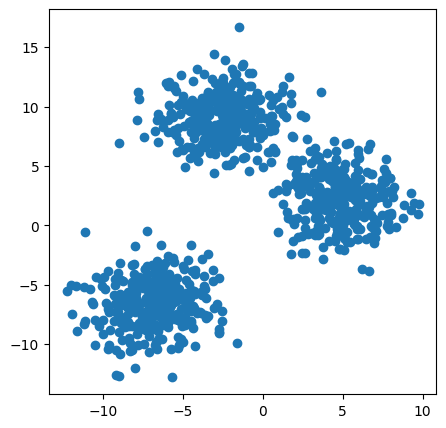

In [5]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(X[:,0], X[:,1]);

## Step 1: The Quality Measure

- Aiming at cohesive clusters, we can minimize the error $E$ as *the distance among points in the same cluster*.

- Aiming at speed, we can define the *center* of a cluster, and measure the distances between each  point and the corresponding cluster center

$$
E = \sum\limits_{i=1}^{k} \sum\limits_{p\in C_i} \textsf{dist}(p,c_i)^2
$$

If we use Euclidean distance:
$$
E = \sum\limits_{i=1}^{k} \sum\limits_{p\in C_i} \|p-c_i\|^2
$$

where $\|\cdot\|$ is the Euclidean norm or $2$-norm.

$E$ is known as Sum of Squared Errors (SSE).

## Step 2: Simplifying assumption

- Assume we know the correct number of clusters is $k$


## Step 3: Define an algorithm

1. Pick $k$ centers at random $c_1, \ldots, c_k$

2. Given the new centers $c_1, \ldots, c_k$, **what is the set of clusters that minimizes the error $E$**?
  - We minimize $\|p-c_i\|^2$ by putting $p$ in the cluster $C_i$ of the closest center $c_i$.


How to improve it ?

**We want to minimize our cost function!**


3. Given the clusters $C_1, \ldots, C_k$, **what is the set of centers that minimizes the error $E$**?  
   - The new center $c_i$ of $C_i$ is the mean of the points $p\in C_i$.

4. Repeat (from 2.) until convergence.

This algorithm is named **k-means**.

---

<div class="alert alert-warning" role="alert">

**Formal derivation of centers**.
</div>   

We simplify the following assuming points are 1D.

$$
\textrm{minimize}\quad E = \sum\limits_{i=1}^{k} \sum\limits_{p\in C_i} \|p-c_i\|^2
$$
$$
\begin{array}{rcl}
\displaystyle\frac{\partial E}{\partial c_i} & = &  \displaystyle\frac{\partial}{\partial c_i} \sum\limits_{i=1}^{k} \sum\limits_{p\in C_i} (p-c_i)^2 = 0 \\
&  & \sum\limits_{p\in C_i} 2 (p-c_i) (-1) = 0 \\ 
&  & \sum\limits_{p\in C_i} p - \sum\limits_{p\in C_i} c_i = 0 \\ 
&  & \sum\limits_{p\in C_i} p - |C_i|\cdot c_i = 0 \\ 
&  & c_i = \displaystyle\frac{\sum\limits_{p\in C_i} p}{|C_i|} \\ 
\end{array}
$$

    
---


## Step-by-Step k-means scikit-learn

"Scikit-learn is a simple and efficient tools for data mining and data analysis"

http://scikit-learn.org/stable/

see: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Iter: 1  | E = 20371.980572525375
Iter: 2  | E = 8155.134499888095
Iter: 3  | E = 7602.246915860092
Iter: 4  | E = 7556.713834598947
Iter: 5  | E = 7543.774671344869
Iter: 6  | E = 7542.814257357566


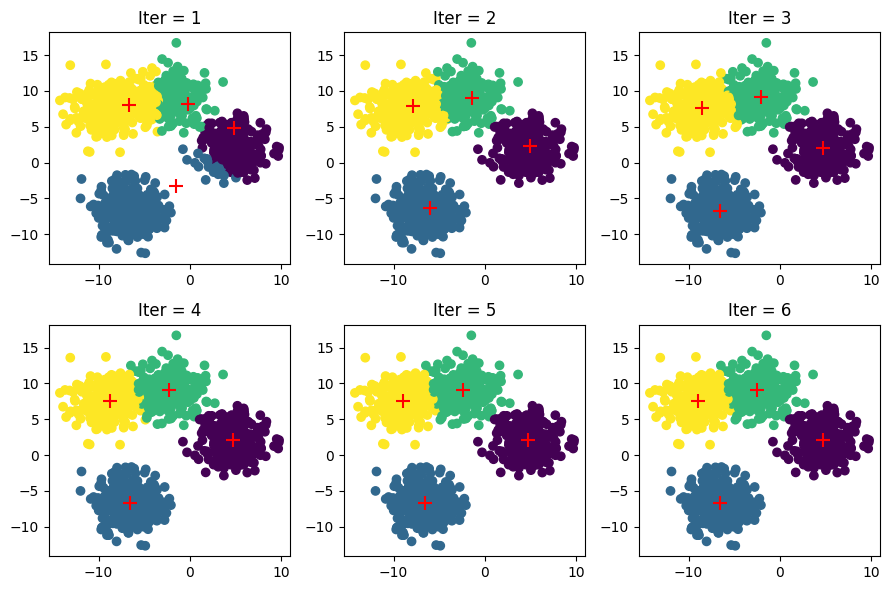

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

N_SAMPLES = 1000
N_CENTERS = 4

# create a random dataset
X, labels_true = make_blobs(n_samples=N_SAMPLES, 
                            centers=N_CENTERS, 
                            cluster_std=2.0,
                            random_state=42);

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(9,6), 
                        tight_layout=True)

for i, ax in enumerate(axs.flatten()):
    
    max_iter = i+1
    
    # run k-means with k=(i+1)
    k_means = KMeans(n_clusters=N_CENTERS, 
                     max_iter=max_iter, 
                     n_init=1, init='random', random_state=11)
    k_means.fit(X)
    
    # plot output of k-means
    ax.scatter(X[:,0], X[:,1], c=k_means.labels_)
    # plot cluster centers
    c = k_means.cluster_centers_
    ax.scatter(c[:,0], c[:,1], c='red', marker='+', s=100)
    # put a title
    ax.set_title("Iter = "+str(max_iter))
    
    # print SSE (named intertial_ by scikit)
    print ("Iter:", max_iter, " | E =", k_means.inertia_)

You can play with k-means here: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

## The K-Means Clustering Method

<div class="alert alert-info">

**K-Means Algorihtm**

- Given the desired number of partitions $k$ and the input dataset $D$, the k-means algorithm is implemented in four steps:
  1. Select $k$ data points at random as centroids
  1. **while** clusters keep changing (or $\Delta E>\tau$) :
  1. $\quad$ **Assign** each object to the cluster with the nearest centroid  
  1. $\quad$ compute **Centroids** of the clusters of the current partitioning (the centroid is the center, i.e., mean point, of the cluster)

    
Computational complexity is $O(tkn)$, where $n$ is # objects, $k$ is # clusters, and $t$  is # iterations. Typically, $k,t \ll n$.    
</div>


## Comments on the K-Means Method

- **Strengths**: 
  - **Efficient**: among the fastest algorithms.
  - Good for spherical, equi-sized, similarly distributed clusters
  - Comment: Often terminates at a **local optimum**. 
- **Weakness**:
  - Need to specify the number of clusters $k$
  - Not suitable to discover clusters with non-spherical shapes
  - Sensitive to noisy data and outliers
    - a far-away point may push the centroid
  - Applicable only to objects in a continuous n-dimensional space 
    - how to compute mean with categorical data?
  - Small clusters might be absorbed by larger ones

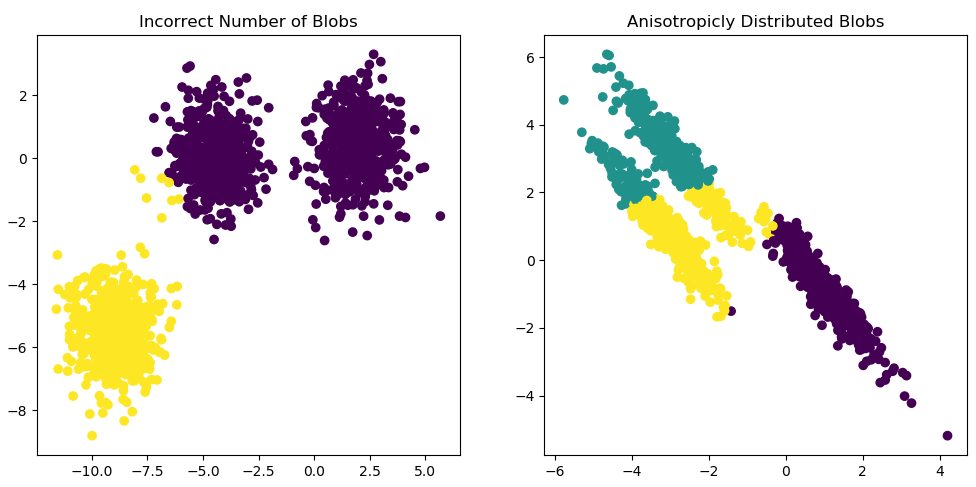

See: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py

# K-means++

K-means is sensitive to the initial centroids selection.

 - for instance random centroids may fall into the same natural cluster

**K-means++** is a strategy for the selection of the initial centroids.

The idea is to make sure centroids are *well separated* and that they *cover* the data.

  1. Pick first centroid at random from the dataset
  1. **Repeat** for the remaining centroids:
  1. $\quad$ for each point $x$ in the data compute its distance to the closest centroid $d(x)$
  1. $\quad$ assign to each point probability (proportional to) $d(x)$
  1. $\quad$ pick a new centroid at random according to the above probabilities


# Elbow method

k-means' SSE error decreases when increasing $k$, but we would like to keep a reasonably small $k$.

Common practice is to stop increasing $k$ if the marginal advantage is small, i.e., stop at the elbow.

Num clusters 1  | Error: 72583.87993931708
Num clusters 2  | Error: 38784.52066621899
Num clusters 3  | Error: 12960.234031492353
Num clusters 4  | Error: 7542.492442187422
Num clusters 5  | Error: 6802.084596134328
Num clusters 6  | Error: 6226.993862297091
Num clusters 7  | Error: 5346.108431594217
Num clusters 8  | Error: 4800.358366937472
Num clusters 9  | Error: 4774.474992022898


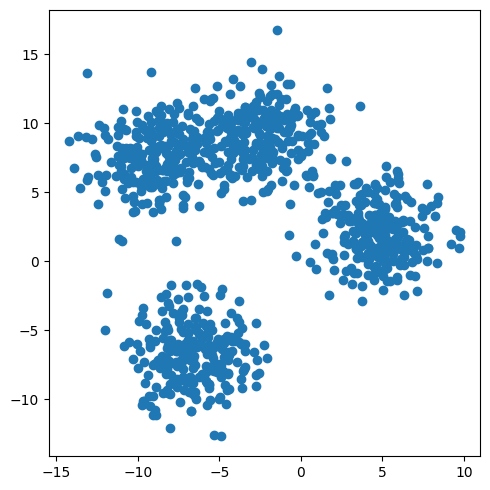

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

N_SAMPLES = 1000
N_CENTERS = 4

# create a random dataset
X, labels_true = make_blobs(n_samples=N_SAMPLES, 
                            centers=N_CENTERS, 
                            cluster_std=2.0,
                            random_state=42);

fig, ax = plt.subplots(figsize=(5,5), 
                        tight_layout=True)
ax.scatter(X[:,0], X[:,1])

## -------------------
## Run the Clustering
## -------------------
k_values = range(1,10)
errors = []

for n_c in k_values:

    k_means = KMeans( n_clusters=n_c, # desired number of clusters
                      max_iter = 100, # max number of iterations
                      n_init = 1      # number of restarts
                    )
    k_means.fit(X)

    errors += [k_means.inertia_]    
    print ("Num clusters", n_c, " | Error:", k_means.inertia_)


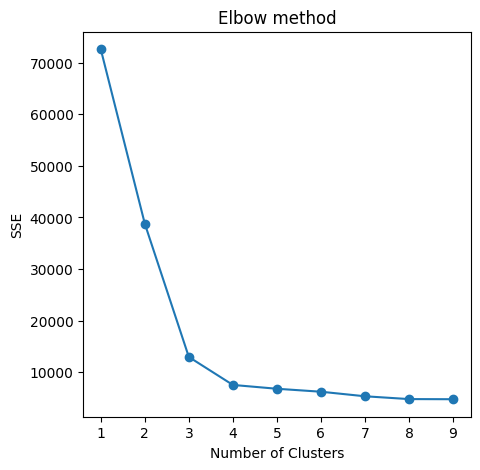

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))

# plot data colored with labels
ax.plot(k_values, errors, 'o-')

ax.set_xlabel('Number of Clusters')
ax.set_ylabel('SSE')
ax.set_title('Elbow method');

We observe the improvement is very limited with $k\geq5$. A good candidate for $k$ is thus $4$.

#### Exercise: Inject outliers and run k-means

#### Exercise: Compare k-means on different synthetic datasets provided by scikit

#### Exercise: Run k-means on songs or movies dataset


---


## Partitioning Algorithms: Basic Concepts

    
- **Partitioning method**: Partitioning a database $D$ of $n$ objects into a set of $k$ clusters, such that the *sum of squared distances* is minimized (where $c_i$ is the centroid or medoid of cluster $C_i$):
$$
E = \sum\limits_{i=1}^{k} \sum\limits_{p\in C_i} \|p-c_i\|^2
$$


- Given $k$, find a partition of $k$ clusters that optimizes the chosen partitioning criterion
  - The problem is **NP-hard** for a general number of clusters $k$ even in the 2-D Euclidean space.
  - Global optimal: exhaustively enumerate all partitions
  - Heuristic methods: k-means and k-medoids algorithms
  - **k-means** (MacQueen’67, Lloyd’57/’82): Each cluster is represented by the center of the cluster
  - **k-medoids or PAM (Partition around medoids)** (Kaufman & Rousseeuw’87): Each cluster is represented by one of the objects in the cluster  




## Partitioning Around Medoids algorithm

**How to decrease sensitivity to outliers?**

- **Idea**: do not compute centers, but rather take a point from the cluster as the new center
  - note: mean is not a point of the dataset
  

<div class="alert alert-info">

**PAM (K-Medoid) Algorihtm**

- Given the desired number of partitions $k$ and the input dataset $D$, the algorithm works as follows:
  1. select $k$ objects $o_1,\ldots,o_k$ (the medoids) from $D$ at random
  1. **while** clusters keep changing (or $\Delta E<\tau$) :
  1. $\quad$**Assign** each object in $D$ to the cluster $C_i$ corresponding to the closest medoid $o_i$
  1. $\quad$**for** every medoid $o_j$ and **for** every other point  $o_{other} \in D$:
  1. $\quad$ $\quad$ **If** replacing $o_j$ with $o_{other}$ reduces $E$:
  1. $\quad$ $\quad$ $\quad$ update medoids
</div>

#### Exercise: Implement k-medoid and compare it with k-means in presence of outliers

---